<a href="https://colab.research.google.com/github/entc-17-fyp-20/CM_Data_Visualizing/blob/samal/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the dataset

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

url1 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/S6%2010%20seconed%20data.csv' #S6 10 seconed data.csv
url2 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V08%20June%2010%20sec%20data.csv?token=ANECSWYTSJHLNER56T5JDR3BCLBDK' #V08 June 10 sec data.csv
url3 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V13%20June%2010%20sec%20data.csv?token=ANECSW37NCJ7TMWXNPKFHM3BCLBK2' #V13 June 10 sec data.csv
df = pd.read_csv(url3)

#df = pd.read_csv('C:\\Users\\Samal\\Documents\\FYP\\Datasets\\S6_TEN_SEC_DATA.csv')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190038 entries, 0 to 190037
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date & Time                        190038 non-null  object 
 1   Voltage Phase R                    190038 non-null  float64
 2   Voltage Phase S                    190038 non-null  float64
 3   Voltage Phase T                    190038 non-null  float64
 4   Frequency Hz                       190038 non-null  float64
 5   Current Phase R                    190038 non-null  float64
 6   Current Phase S                    190038 non-null  float64
 7   Current Phase T                    190038 non-null  float64
 8   Reactive Power kVAR                190038 non-null  float64
 9   Active Power kW                    190038 non-null  float64
 10  Wind Speed m/s                     190038 non-null  float64
 11  Nacelle Temperature                1900

In [3]:
df1 = df

df1 = df1.drop([0])
df1['Date & Time'] = pd.to_datetime(df1['Date & Time'], format="%d/%m/%Y %H:%M:%S")
df1["Active Power kW"] = pd.to_numeric(df1["Active Power kW"], downcast="float")
df1["Wind Speed m/s"] = pd.to_numeric(df1["Wind Speed m/s"], downcast="float")



Variance of features

In [26]:
df.var()

Voltage Phase R                        115.920869
Voltage Phase S                        155.839207
Voltage Phase T                        142.231052
Frequency Hz                             7.256663
Current Phase R                      13718.961498
Current Phase S                      13759.250903
Current Phase T                      13730.366175
Reactive Power kVAR                    230.870372
Active Power kW                      45518.983235
Wind Speed m/s                           2.664689
Nacelle Temperature                      0.297514
Ambient Temperature                      0.633399
Gearbox oil Temperature                 18.275044
Gearbox Bearing Temperature             25.747510
Generator Winding Temperature R        356.177856
Generator Winding Temperature S        347.496141
Generator Winding Temperature T        352.286206
Hydraulic unit Pressure in bar         121.325503
Hydraulic oil Temperature                1.191759
Main bearing Temperature                 1.098662


In [27]:
df

,Date & Time,Voltage Phase R,Voltage Phase S,Voltage Phase T,Frequency Hz,Current Phase R,Current Phase S,Current Phase T,Reactive Power kVAR,Active Power kW,Wind Speed m/s,Nacelle Temperature,Ambient Temperature,Gearbox oil Temperature,Gearbox Bearing Temperature,Generator Winding Temperature R,Generator Winding Temperature S,Generator Winding Temperature T,Hydraulic unit Pressure in bar,Hydraulic oil Temperature,Main bearing Temperature,Generator Bearing Temperature DE,Generator Bearing Temperature NDE,Generator RPM
0,02/06/2021 00:00:00,575.1,573.7,575.3,50.04,232.0,232.4,230.1,13.9,385.9,8.4,30.8,30.6,63.2,85.8,104.7,104.5,107.4,168.8,45.9,44.1,79.7,73.0,1408.4
1,02/06/2021 00:00:10,574.3,573.8,573.9,50.06,190.4,186.5,185.7,-3.7,299.0,8.3,30.8,30.6,62.8,85.9,104.3,105.0,106.9,172.3,45.8,44.1,79.8,73.1,1392.7
2,02/06/2021 00:00:20,578.6,572.3,573.4,50.06,195.9,197.1,192.6,-14.3,344.3,8.2,30.8,30.5,63.2,85.8,104.4,104.5,108.4,168.0,45.8,44.1,79.7,73.1,1439.5
3,02/06/2021 00:00:30,574.4,575.7,575.3,50.08,249.6,249.6,247.4,-25.2,426.5,8.4,30.8,30.5,62.9,85.9,104.7,104.6,106.4,173.9,45.9,44.1,79.8,73.1,1491.7
4,02/06/2021 00:00:40,577.2,570.1,579.3,50.10,309.8,311.3,308.1,-19.8,546.0,9.2,30.8,30.6,63.1,85.9,104.9,104.1,107.7,166.8,45.8,44.1,79.7,73.1,1497.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190033,30/06/2021 23:43:10,570.3,575.0,573.7,50.10,284.2,285.3,286.5,17.3,472.0,8.7,30.6,30.9,63.7,86.1,110.1,109.4,112.3,171.6,45.5,43.7,64.3,66.7,1335.1
190034,30/06/2021 23:43:20,574.2,572.0,575.4,50.06,258.3,254.8,258.5,5.0,422.0,8.5,30.7,30.8,64.1,85.9,109.9,109.3,111.9,167.9,45.6,43.7,64.1,66.6,1395.9
190035,30/06/2021 23:43:30,569.2,575.2,572.0,50.04,292.6,296.1,294.7,-9.9,489.2,8.4,30.6,30.7,63.8,86.0,110.0,109.5,111.7,174.8,45.5,43.7,64.1,66.7,1466.2
190036,30/06/2021 23:43:40,574.5,572.5,575.3,50.02,313.9,318.1,311.4,1.9,521.4,9.2,30.7,30.6,64.0,86.0,109.4,109.5,111.1,166.5,45.5,43.7,64.2,66.7,1466.2


Combine correlated features

In [28]:
df["voltage"] = (df["Voltage Phase R"] + df["Voltage Phase S"]+ df["Voltage Phase T"])/3
df["current"]  = (df["Current Phase R"] + df["Current Phase S"]+ df["Current Phase T"])/3
df["Gearbox & Bearing temp"]  = (df["Gearbox Bearing Temperature"] + df["Gearbox oil Temperature"]+ df["Generator Winding Temperature R"]+df["Generator Winding Temperature S"]+df["Generator Winding Temperature T"]+df["Main bearing Temperature"] + df["Generator Bearing Temperature DE"]+ df["Generator Bearing Temperature NDE"])/8


df.drop(["Reactive Power kVAR", "Frequency Hz","Voltage Phase R","Voltage Phase S","Voltage Phase T","Current Phase R","Current Phase S","Current Phase T","Gearbox Bearing Temperature","Gearbox oil Temperature","Generator Winding Temperature R","Generator Winding Temperature S","Generator Winding Temperature T","Main bearing Temperature","Generator Bearing Temperature DE","Generator Bearing Temperature NDE"], axis='columns', inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190038 entries, 0 to 190037
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Date & Time                     190038 non-null  object 
 1   Active Power kW                 190038 non-null  float64
 2   Wind Speed m/s                  190038 non-null  float64
 3   Nacelle Temperature             190038 non-null  float64
 4   Ambient Temperature             190038 non-null  float64
 5   Hydraulic unit Pressure in bar  190038 non-null  float64
 6   Hydraulic oil Temperature       190038 non-null  float64
 7   Generator RPM                   190038 non-null  float64
 8   voltage                         190038 non-null  float64
 9   current                         190038 non-null  float64
 10  Gearbox & Bearing temp          190038 non-null  float64
dtypes: float64(10), object(1)
memory usage: 15.9+ MB


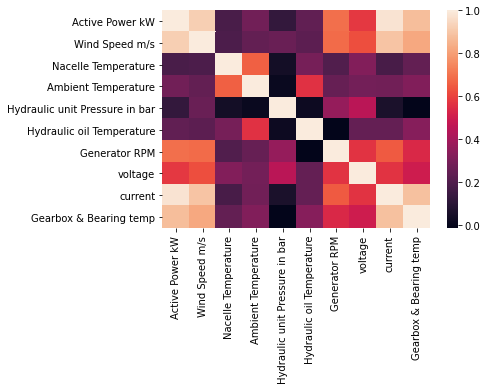

In [30]:
sns.heatmap(df.corr());

In [45]:
df=df.drop(["Date & Time"],axis='columns')

In [46]:
df

,Active Power kW,Wind Speed m/s,Nacelle Temperature,Ambient Temperature,Hydraulic unit Pressure in bar,Hydraulic oil Temperature,Generator RPM,voltage,current,Gearbox & Bearing temp
0,385.9,8.4,30.8,30.6,168.8,45.9,1408.4,574.700000,231.500000,82.8000
1,299.0,8.3,30.8,30.6,172.3,45.8,1392.7,574.000000,187.533333,82.7375
2,344.3,8.2,30.8,30.5,168.0,45.8,1439.5,574.766667,195.200000,82.9000
3,426.5,8.4,30.8,30.5,173.9,45.9,1491.7,575.133333,248.866667,82.6875
4,546.0,9.2,30.8,30.6,166.8,45.8,1497.7,575.533333,309.733333,82.8250
...,...,...,...,...,...,...,...,...,...,...
190033,472.0,8.7,30.6,30.9,171.6,45.5,1335.1,573.000000,285.333333,82.0375
190034,422.0,8.5,30.7,30.8,167.9,45.6,1395.9,573.866667,257.200000,81.9375
190035,489.2,8.4,30.6,30.7,174.8,45.5,1466.2,572.133333,294.466667,81.9375
190036,521.4,9.2,30.7,30.6,166.5,45.5,1466.2,574.100000,314.466667,81.8250


In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Active Power kW,190038.0,511.278359,213.351783,-45.1,322.000000,546.500000,733.800000,782.500000
Wind Speed m/s,190038.0,8.987771,1.632387,0.0,7.900000,9.200000,10.200000,15.900000
Nacelle Temperature,190038.0,30.375022,0.545448,0.0,30.100000,30.400000,30.700000,32.900000
Ambient Temperature,190038.0,30.778992,0.795863,0.0,30.300000,30.800000,31.300000,32.800000
Hydraulic unit Pressure in bar,190038.0,169.104910,11.014786,0.0,164.800000,169.200000,174.400000,180.700000
Hydraulic oil Temperature,190038.0,46.830931,1.091677,0.0,46.000000,46.800000,47.600000,50.200000
Generator RPM,190038.0,1395.282547,184.014974,0.0,1378.000000,1442.300000,1490.300000,1572.300000
voltage,190038.0,578.519325,11.495493,0.0,574.066667,579.366667,584.466667,600.300000
current,190038.0,301.018910,117.190716,0.0,195.966667,320.133333,424.166667,452.633333
Gearbox & Bearing temp,190038.0,83.720020,10.180192,0.0,76.100000,84.650000,93.262500,98.262500


In [48]:
(df==0).sum()

Active Power kW                   855
Wind Speed m/s                    550
Nacelle Temperature                12
Ambient Temperature                11
Hydraulic unit Pressure in bar    551
Hydraulic oil Temperature          12
Generator RPM                     561
voltage                            12
current                           144
Gearbox & Bearing temp             11
dtype: int64

In [49]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_sc =  sc.fit_transform(df)

In [52]:
cov_matrix = np.cov(df_sc.T)
print("cov_matrix shape:",cov_matrix.shape)
print("Covariance_matrix",cov_matrix)

cov_matrix shape: (10, 10)
Covariance_matrix [[ 1.00000526  0.92111191  0.18139954  0.28152147  0.12162877  0.24290445
   0.69146616  0.57682821  0.9786101   0.8781361 ]
 [ 0.92111191  1.00000526  0.18961973  0.24586454  0.26165965  0.2283965
   0.68728579  0.62570492  0.89646586  0.82323824]
 [ 0.18139954  0.18961973  1.00000526  0.66196195  0.04139086  0.29381916
   0.2038087   0.32087871  0.18036931  0.24565484]
 [ 0.28152147  0.24586454  0.66196195  1.00000526  0.01389679  0.5628966
   0.25354707  0.28376138  0.28118144  0.31614994]
 [ 0.12162877  0.26165965  0.04139086  0.01389679  1.00000526  0.01916466
   0.36612852  0.45180072  0.06019975 -0.01071208]
 [ 0.24290445  0.2283965   0.29381916  0.5628966   0.01916466  1.00000526
  -0.01331805  0.24934669  0.25130053  0.32795739]
 [ 0.69146616  0.68728579  0.2038087   0.25354707  0.36612852 -0.01331805
   1.00000526  0.56743905  0.64814508  0.53773774]
 [ 0.57682821  0.62570492  0.32087871  0.28376138  0.45180072  0.24934669
   0.567

In [53]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-4.17967742e-01 -1.50421470e-01 -1.86394587e-01 -4.52915083e-03
   7.42611143e-01  5.27287413e-02 -9.69963840e-02 -3.72376280e-01
  -2.43086362e-01  8.06094898e-02]
 [-4.11309398e-01 -1.69622141e-01 -5.22231328e-02 -5.37009363e-02
  -9.37321531e-02 -5.90384094e-03 -2.30919263e-01  7.31539299e-01
  -4.41634309e-01  6.40856871e-02]
 [-1.70505278e-01  5.27887366e-01  1.81115360e-01  5.27774161e-01
  -2.07171437e-03 -3.27450557e-01 -3.71617385e-01 -7.68269287e-02
  -1.07549109e-01 -3.43682576e-01]
 [-2.08811209e-01  5.89187054e-01  5.95075333e-02  1.29134738e-01
   7.08362284e-04  4.20425415e-01  1.79279869e-01  7.40097161e-02
   5.69573069e-02  6.09441295e-01]
 [-1.14609471e-01 -1.52373226e-01  7.62761043e-01 -2.85677944e-01
  -2.57556956e-02  1.76826763e-01 -4.65674145e-01 -1.49779583e-01
   1.25074055e-01  1.15628118e-01]
 [-1.66633175e-01  4.89600177e-01 -8.91782050e-02 -7.11939688e-01
  -8.17797151e-03  8.60362783e-02  8.03909704e-02 -2.46728849e-02
  -8.23640705e-

In [54]:
# Make a set of (eigenvalue, eigenvector) pairs:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]
# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()
print(eig_pairs)
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]
# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(5.044477723790795, array([-0.41796774, -0.4113094 , -0.17050528, -0.20881121, -0.11460947,
       -0.16663318, -0.33670563, -0.32761496, -0.41204909, -0.38995478])), (1.7339188425904222, array([-0.15042147, -0.16962214,  0.52788737,  0.58918705, -0.15237323,
        0.48960018, -0.19873105, -0.01787937, -0.13566157, -0.04063937])), (1.2759544370316833, array([-0.18639459, -0.05222313,  0.18111536,  0.05950753,  0.76276104,
       -0.08917821,  0.22826028,  0.37104343, -0.23642723, -0.30125555])), (0.766075969799524, array([-0.00452915, -0.05370094,  0.52777416,  0.12913474, -0.28567794,
       -0.71193969,  0.31934857, -0.10073955, -0.00581781, -0.03519282])), (0.4221030979573522, array([ 0.05272874, -0.00590384, -0.32745056,  0.42042541,  0.17682676,
        0.08603628,  0.50797777, -0.63580284, -0.01492785, -0.1096539 ])), (0.3165061761949668, array([-0.09699638, -0.23091926, -0.37161739,  0.17927987, -0.46567415,
        0.08039097,  0.41235414,  0.55799336, -0.06322672, -0.241499

In [55]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  
cum_var_exp = np.cumsum(var_explained)

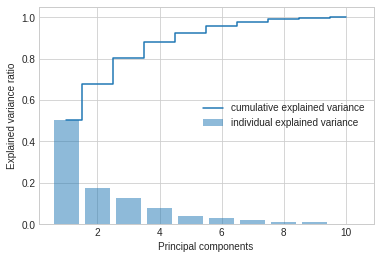

In [56]:
plt.bar(range(1,11), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,11),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()


In [58]:
# P_reduce represents reduced mathematical space....
P_reduce = np.array(eigvectors_sorted[0:7])   # Reducing from 8 to 4 dimension space
X_std_7D = np.dot(df_sc,P_reduce.T)   # projecting original data into principal component dimensions
reduced_pca = pd.DataFrame(X_std_7D)  # converting array to dataframe for pairplot
reduced_pca

,0,1,2,3,4,5,6
0,0.817630,0.090891,0.371475,1.082049,-0.190588,-0.342041,-0.261577
1,1.197577,0.138475,0.749616,1.042910,-0.161747,-0.487678,-0.234515
2,1.064343,0.041121,0.470514,1.214095,-0.187984,-0.200765,-0.451687
3,0.489740,-0.192607,0.767306,1.072980,0.053478,-0.397641,-0.471179
4,-0.124696,-0.310698,0.054778,1.313122,-0.003712,-0.253047,-0.298328
...,...,...,...,...,...,...,...
190033,0.611593,-0.168050,0.237411,1.001403,0.014612,-0.625345,0.563768
190034,0.744951,-0.027277,0.211940,1.219988,-0.036832,-0.305324,0.134866
190035,0.429198,-0.491744,0.557807,1.130466,0.375421,-0.521911,0.080658
190036,0.123820,-0.485769,-0.018499,1.381428,0.024270,-0.302135,-0.054334


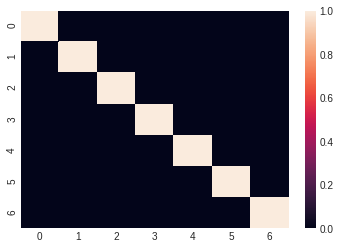

In [60]:
sns.heatmap(reduced_pca.corr());